In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data extraction

In [4]:
X_train=pd.read_csv("Training Data/Logistic_X_Train.csv").values
Y_train=pd.read_csv("Training Data/Logistic_Y_Train.csv").values
X_test=pd.read_csv("Test Cases/Logistic_X_Test.csv").values


## Normalization

In [5]:
X_train=(X_train-X_train.mean())/X_train.std()

In [6]:
X_test=(X_test-X_test.mean())/X_test.std()

## Adding one's vector as first feature 

In [61]:
X_train=np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1)

In [62]:
X_test=np.concatenate((np.ones((X_test.shape[0],1)),X_test),axis=1)

## Model Building

In [52]:
def sigmoid(X_theta):
    return 1/(1+np.exp(-X_theta))
def hypothesis(X,theta):
    return sigmoid(np.dot(X,theta))
def error(X,Y,theta):
    return -1*(np.mean((Y)*(np.log(hypothesis(X,theta)))+(1-Y)*(np.log(1-hypothesis(X,theta)))))
def gradient(X,Y,theta):
    return -np.dot(X.T,(Y-hypothesis(X,theta)))/X.shape[0]
def gradient_descent(X,Y,lr=0.2,max_iter=400):
    theta=np.zeros((X.shape[1],1))
    error_list=[]
    for i in range(max_iter):
        error_list.append(error(X,Y,theta))
        grad=gradient(X,Y,theta)
        theta-=lr*(grad)
    return theta,error_list
    

## Model IMplementation

In [53]:
theta,error_list=gradient_descent(X_train,Y_train)

In [54]:
print(theta)

[[-2.21754255]
 [-2.41667391]
 [ 1.56490129]
 [-2.47521233]]


In [55]:
##print(error_list)

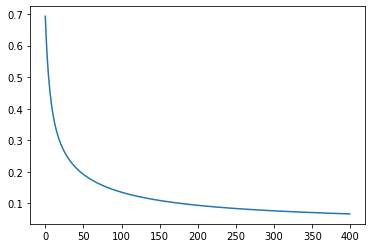

In [56]:
plt.plot(error_list)

## Predicting output

In [72]:
import time

In [85]:
def predict(X):
    y_=np.zeros((X.shape[0],1))
    
    begin = time.time()
    # for i in range(X.shape[0]):
    #     if (hypothesis(X[i],theta)>=0.5):
    #         y_[i]=1
   
    
    y_[hypothesis(X,theta)>=0.5]=1
    
    end = time.time()
    print(f"Total runtime of the program is {end - begin}")
    return y_

In [95]:
y_=predict(X_test)

Total runtime of the program is 0.0


In [96]:
y_=y_.astype('int')

In [97]:
y_=pd.DataFrame(y_,columns=["label"])

In [98]:
y_.to_csv("submit_1.csv",index=False)